### **Cargando Datos**

In [392]:
# Importando libreias
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

pd.set_option('display.max_columns', None)

In [393]:
# Leer el dataset y mostrar 5 filas aleatorias
data = pd.read_csv('Datos/dataset.csv')
data.sample(5)

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness,audio_features.instrumentalness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.id,audio_features.time_signature,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks
467,1,352200,False,9,78,3sqrvkNC6IPTIXvvbx9Arw,Enchanted,0.535,0.618,8.0,-3.913,1,0.0273,0.07160,0.000388,0.169,0.228,81.975,3sqrvkNC6IPTIXvvbx9Arw,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,6S6JQWzUrJVcJLK4fi74Fw,Speak Now (Deluxe Package),2010-01-01,22
166,1,312107,False,15,68,0tQ9vBYpldCuikPsbgOVKA,Untouchable (Taylor’s Version),0.393,0.531,5.0,-6.112,1,0.0329,0.01810,0,0.169,0.224,200.391,0tQ9vBYpldCuikPsbgOVKA,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26
207,1,257773,False,13,75,12ntTeqEeTg7GAVpe8Mhpl,marjorie,0.535,0.561,5.0,-11.609,1,0.0484,0.87600,0.000136,0.115,0.287,96.103,12ntTeqEeTg7GAVpe8Mhpl,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,2Xoteh7uEpea4TohMxjtaq,evermore,2020-12-11,10
379,1,193293,False,5,60,NaN,All You Had To Do Was Stay,0.605,0.725,5.0,-5.729,1,0.0323,0.00201,2.02e-05,0.101,0.539,96.970,6aLOekfwbytwWvQftxTEF0,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19
371,1,235400,False,43,33,4RMfSYDFkcz0bKoK8fHDgR,White Horse,0.578,0.348,0.0,-8.066,1,0.0257,0.31400,0,0.100,0.218,92.673,4RMfSYDFkcz0bKoK8fHDgR,4.0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1MPAXuTVL2Ej5x0JHiSPq8,NaN,2017-11-09,46


### **Entender el Contexto y los Datos**

Tener el contexto de los datos es importante, por eso con la documentación de referencia que proporcionaron se obtuvó la siguiente información:

Los datos son una recopilación de información sobre pistas musicales (tracks) de Spotify, incluyendo detalles sobre las pistas individuales, sus características de audio, así como información relacionada con los artistas y álbumes correspondientes. A continuación se muestra una de los campos:

* disc_number: Número de disco en el álbum al que pertenece la pista
* duration_ms: Duración de la pista en milisegundos
* explicit: Indica si la pista tiene contenido explícito
* track_number: Número de la pista en el álbum
* track_popularity: Popularidad de la pista
* track_id: ID único de Spotify para la pista
* track_name: Nombre de la pista
* audio_features.danceability: Describe qué tan adecuada es una pista para bailar basada en una combinación de elementos musicales incluyendo tempo, estabilidad del ritmo, fuerza del ritmo y regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable
* audio_features.energy: Medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad
* audio_features.key: La tonalidad en la que está la música. Los enteros se asignan a las tonalidades
* audio_features.loudness: Volumen general de una pista en decibelios (dB)
* audio_features.mode: Modalidad de la pista. Mayor o menor
* audio_features.speechiness: Detecta la presencia de palabras habladas en una pista
* audio_features.acousticness: Confianza de 1.0 significa que la pista es acústica
* audio_features.instrumentalness: Predice si una pista no contiene voces
* audio_features.liveness: Detecta la presencia de una audiencia en la grabación
* audio_features.valence: Medida de 0.0 a 1.0 describiendo la positividad musical
* audio_features.tempo: Tempo general de una pista en latidos por minuto (BPM)
* audio_features.id: ID de Spotify de las características de audio
* audio_features.time_signature: La firma de tiempo estimada de una pista
* artist_id: ID único de Spotify para el artista
* artist_name: Nombre del artista
* artist_popularity: Popularidad del artista
* album_id: ID único de Spotify para el álbum
* album_name: Nombre del álbum
* album_release_date: Fecha de lanzamiento del álbum
* album_total_tracks: Número total de pistas en el álbum

Entender lo que representa cada campo permite interpretar correctamente los datos, identificar inconsistencias, e identificar el manejo de nulos adecuado. Por ejemplo,  un valor negativo en "track_popularity", que se espera esté entre 0 y 100, indicaría un error

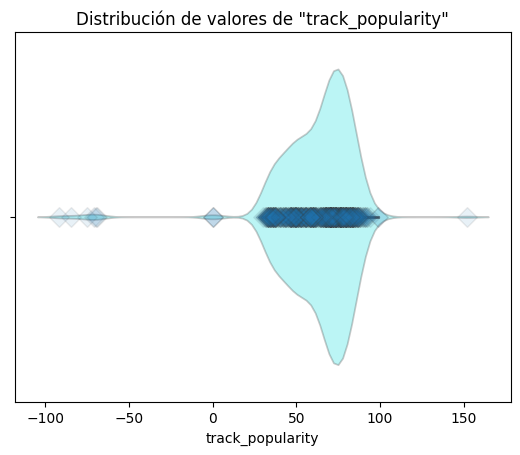

In [394]:
# Distribución de valores de track_popularity
sns.violinplot(x=data['track_popularity'], alpha=0.3, color='cyan')
sns.stripplot(x=data['track_popularity'], jitter=False, s=10, marker="D", linewidth=1, alpha=.1)
plt.title('Distribución de valores de "track_popularity"')
plt.show()

### **Definiciones de los Datos**

Construir las definiciones de los datos es una tarea dispendiosa, pero crucial para definir politicas de calidad de datos. Es por eso que se coplementa el análisis previo de campos usando la documentación de los links de la API de Spotify proporcionados:

**Track Data**:

* disc_number: Tipo entero. No obligatorio. Indica el número de disco, generalmente 1 a menos que el álbum tenga más de un disco​​

* duration_ms: Tipo entero. No obligatorio. Representa la duración de la pista en milisegundos​​​​

* explicit: Tipo booleano. No obligatorio. Indica si la pista tiene letras explícitas (true = sí, false = no o desconocido)​​

* track_number: Tipo entero. No obligatorio. Número de la pista. Si un álbum tiene varios discos, es el número en el disco especificado​​

* track_popularity: Tipo entero. No obligatorio. Popularidad de la pista, con valores entre 0 y 100, siendo 100 el más popular​​

* track_id: Tipo cadena (string). Obligatorio. Es el ID de Spotify para la pista​​. Ejemplo: 11dFghVXANMlKmJXsNCbNl

* track_name: Tipo cadena (string). No obligatorio. Nombre de la pista​​

**Track's Audio Features**:

* audio_features.danceability: Tipo número flotante (float). No obligatorio. Mide qué tan adecuada es una pista para bailar en una escala de 0.0 a 1.0​​. Ejemplo: 0.585

* audio_features.energy: Tipo número flotante. No obligatorio. Mide la energía de una pista en una escala de 0.0 a 1.0​​. Ejemplo: 0.842

* audio_features.key: Tipo entero.  No obligatorio. La clave musical en la que está la pista. Varía de -1 a 11​​, donde -1 indica no clave detectada. Ejemplo: 9

* audio_features.loudness: Tipo número flotante. No obligatorio. La sonoridad general de una pista en decibeles (dB)​​. Ejemplo: -5.883

* audio_features.mode: Tipo entero. No obligatorio. Indica la modalidad (mayor o menor) de una pista. Mayor es 1 y menor es 0​​*****

* audio_features.speechiness: Tipo número flotante. No obligatorio. Detecta la presencia de palabras habladas en una pista​​, cuanto más hablada sea será más cercana a 1. Ejemplo: 0.0556

* audio_features.acousticness: Tipo número flotante. No obligatorio. Medida de confianza de si la pista es acústica, en una escala de 0.0 a 1.0​​. Ejemplo: 0.00242

* audio_features.instrumentalness: Tipo número flotante. No obligatorio. Predice si una pista no contiene voces​​, cuanto más cercano a 1.0 más probable de que la pista no contenga voces. Ejemplo: 0.00686

* audio_features.liveness: Tipo número flotante. No obligatorio. Detecta la presencia de audiencia en la grabación​​, cuando mayor sea el número mayor probabilidad de que la pista fue realizada en vivo. Ejemplo: 0.0866

* audio_features.valence: Tipo número flotante. No obligatorio. Mide la positividad musical transmitida por una pista, en una escala de 0.0 a 1.0​​, donde 1.0 es muy positiva. Ejemplo: 0.428

* audio_features.tempo: Tipo número flotante. No obligatorio. El tempo estimado de una pista en latidos por minuto (BPM)​​. Ejemplo: 118.211

* audio_features.id: Tipo cadena (string). Obligatio. Es el ID de Spotify para la pista​​. Ejemplo: 11dFghVXANMlKmJXsNCbNl

* audio_features.time_signature: Tipo entero. No obligatorio. Firma de tiempo estimada de una pista, varía de 3 a 7​​

**Artist Data**:

* artist_id: Tipo cadena (string). Obligatorio. ID de Spotify para el artista​​. Ejemplo: 0TnOYISbd1XYRBk9myaseg

* artist_name: Tipo cadena (string). No obligatorio. Nombre del artista​​

* artist_popularity: Tipo entero. No obligatorio. Popularidad del artista, con valores entre 0 y 100, siendo 100 el más popular​​

**Album Data**:

* album_id: Tipo cadena (string). Obligatorio. ID de Spotify para el álbum​​. Ejemplo: 4aawyAB9vmqN3uQ7FjRGTy

* album_name: Tipo cadena (string). Obligatorio. Nombre del álbum​​

* album_release_date: Tipo cadena (string). Obligatorio. Fecha de lanzamiento del álbum​​. Ejemplo: "1981-12"

* album_total_tracks: Tipo entero. Obligatorio. Número de pistas en el álbum​​. Ejemplo: 9

Esta información tabular fue obtenida de diferentes categorias de la API de Spotify. Recordemos que <u>las API contienen categorias que se utilizan para organizar y estructurar los diferentes tipos de operaciones y datos</u> que la API puede manejar, además de facilitar la navegación por la API. Por ejemplo, para la ruta "References / Tracks / Get Track's Audio Features", tenemos que:
- References: Indica la sección de documentación donde se detallan los distintos recursos y métodos disponibles
- Tracks: Específicamente se refiere a la categoría de recursos relacionados con las pistas o canciones
- Get Track's Audio Features: Este es un método específico que permite obtener características de audio de una pista, como el tempo, la energía, la danzabilidad, etc

Es por eso que vemos cuatro categorias en los campos descritos, donde cada categoría se enfoca en un tipo de recurso específico
1. Tracks
2. Track's Audio Features
3. Albums
4. Artists 

Al ser Track's Audio Features una característica dentro de Tracks, ambas estan vinculadas mediante un ID (track_id y audio_features.id), este dato es importante conocer porque permite evaluar ciertas dimensiones de calidad más adelante

### **Analisis de Calidad Exploratorio**

Comenzaremos a realizar una descripción general de los datos:

In [395]:
# Presencia de valores nulos
def calcular_nulos(df):
    campos_obligatorios = ['track_id', 'audio_features.id', 'artist_id', 'album_id','album_name', 'album_release_date', 'album_total_tracks']
    nulos = df.isnull().sum()
    porcentaje = (df.isnull().sum() / len(df)) * 100
    obligatorio = [campo in campos_obligatorios for campo in nulos.index]
    resultado = pd.DataFrame({'Número de Nulos': nulos, 'Porcentaje': porcentaje, '¿Es Obligatorio?': obligatorio})
    return resultado.sort_values('Número de Nulos', ascending=False).round(2)

calcular_nulos(data)

,Número de Nulos,Porcentaje,¿Es Obligatorio?
album_name,62,11.50,True
track_id,8,1.48,True
track_name,7,1.30,False
audio_features.loudness,2,0.37,False
audio_features.danceability,2,0.37,False
audio_features.energy,2,0.37,False
audio_features.acousticness,1,0.19,False
audio_features.time_signature,1,0.19,False
audio_features.liveness,1,0.19,False
audio_features.speechiness,1,0.19,False


In [396]:
# Verificar tipos de datos y número de valores únicos
pd.merge(data.dtypes.to_frame('Tipos de datos'), data.nunique().to_frame('Valores unicos'),left_index=True, right_index=True)

,Tipos de datos,Valores unicos
disc_number,int64,2
duration_ms,int64,364
explicit,object,4
track_number,int64,46
track_popularity,int64,73
track_id,object,512
track_name,object,331
audio_features.danceability,float64,267
audio_features.energy,float64,348
audio_features.key,float64,12


In [397]:
# Revisar duplicados
print('Número de registros duplicados:',data.duplicated().sum())

Número de registros duplicados: 18


El análisis inicial de los datos revela varias cuestiones de calidad de datos:

* Valores Faltantes: Varios campos tienen valores nulos. Por ejemplo, track_id y track_name tienen 8 y 7 valores nulos respectivamente. Hay que evaluar si desde negocio esta permitido la presencia de nulos, por ejemplo, se esperaria que track_id no tenga nulos al ser un PK

* Tipo de Datos: Algunos campos pueden tener tipos de datos inapropiados. Por ejemplo, album_total_tracks está como objeto, lo que sugiere que puede contener datos no numéricos

* Duplicados: Hay 18 registros duplicados en el conjunto de datos.

## **Análisis de Dimensiones de Calidad**

Para realizar un análisis de calidad de los datos, se usarán las dimensiones de calidad de datos para identificar posibles anomalías . Estas dimensiones incluyen de forma no exhaustiva:

* Exactitud: Verificar si los datos son correctos y precisos
* Completitud: Chequear si hay valores faltantes o nulos en los datos
* Consistencia: Asegurar que los datos en diferentes campos son consistentes entre sí
* Validez: Comprobar que los datos siguen reglas y restricciones específicas (por ejemplo, formatos de fecha)
* Unicidad: Identificar duplicados y asegurarse de que cada registro es único
* Actualidad: Evaluar si los datos son suficientemente actuales para el análisis

### **1. Exactitud**
La exactitud de un dato se refiere a qué tan cercano está ese dato a su valor verdadero o de referencia, esto depende en gran medida del contexto y de tener una referencia conocida, se mide segun el grado en que los datos reflejan las características del objeto u objetos del mundo real que representa.En la siguiente imagen de muestra cómo la propiedad de exacto que es quella que corresponde con el valor esperado

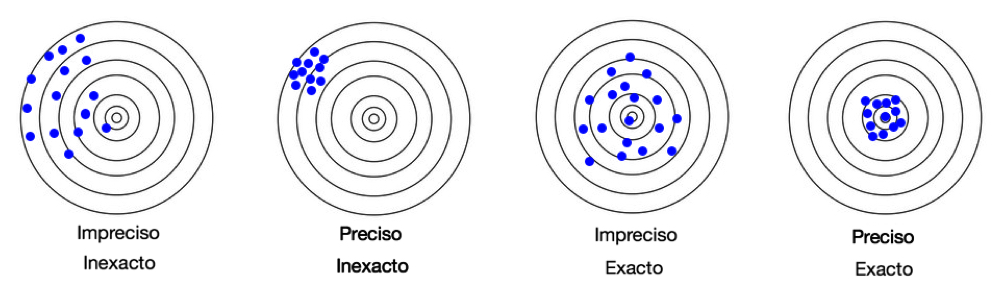

In [398]:
exactitud = Image.open("Imagenes/exactitud.jpeg")
display(exactitud)

Debido a que no tenemos mucho contexto de cómo deberia se cada tipo de datos, vamos a utilizar la información de los campos que otorga la web de la API de Spotify para verificar tipo de dato y rango de valores permitidos

In [399]:
# Asignación de tipos de datos esperados según la API de Spotify
tipo_esperado = {
    'disc_number': 'int64',
    'duration_ms': 'int64',
    'explicit': 'bool',
    'track_number': 'int64',
    'track_popularity': 'int64',
    'track_id': 'object',
    'track_name': 'object',
    'audio_features.danceability': 'float64',
    'audio_features.energy': 'float64',
    'audio_features.key': 'int64',
    'audio_features.loudness': 'float64',
    'audio_features.mode': 'int64',
    'audio_features.speechiness': 'float64',
    'audio_features.acousticness': 'float64',
    'audio_features.instrumentalness': 'float64',
    'audio_features.liveness': 'float64',
    'audio_features.valence': 'float64',
    'audio_features.tempo': 'float64',
    'audio_features.id': 'object', 
    'audio_features.time_signature': 'int64',
    'artist_id': 'object',
    'artist_name': 'object',
    'artist_popularity': 'int64',
    'album_id': 'object',
    'album_name': 'object',
    'album_release_date': 'object',
    'album_total_tracks': 'int64'
}

# Identificando de tipos de datos diferentes a los esperados
mismatches = {column: data[column].dtype for column in data.columns if str(data[column].dtype) != tipo_esperado[column]}
print('Los campos con tipo de datos distintos son:')
mismatches

Los campos con tipo de datos distintos son:


{'explicit': dtype('O'),
 'audio_features.key': dtype('float64'),
 'audio_features.instrumentalness': dtype('O'),
 'audio_features.time_signature': dtype('float64'),
 'album_total_tracks': dtype('O')}

In [400]:
# Verificación de rangos y valores esperados
# Popularidad de la pista y el artista debe estar entre 0 y 100
rangos_track_popularity = data[(data['track_popularity'] < 0) | (data['track_popularity'] > 100) | (data['artist_popularity'] < 0) | (data['artist_popularity'] > 100)]

# La clave musical debe estar entre -1 y 11
rangos_audio_features = data[(data['audio_features.key'] < -1) | (data['audio_features.key'] > 11)]

# Firma de tiempo debe estar entre 3 y 7
rango_time_signature = data[(data['audio_features.time_signature'] < 3) | (data['audio_features.time_signature'] > 7)]

print(f"Número de registros fuera de rango en track_popularity: {len(rangos_track_popularity)}")
print(f"Número de registros fuera de rango en audio_features: {len(rangos_audio_features)}")
print(f"Número de registros fuera de rango en time_signature: {len(rango_time_signature)}")

Número de registros fuera de rango en track_popularity: 539
Número de registros fuera de rango en audio_features: 0
Número de registros fuera de rango en time_signature: 0


**Hallazgos**:

Desajustes de Tipos de Datos:
* explicit: Debería ser booleano, pero se encuentra como objeto
* audio_features.key: Debería ser entero, pero se encuentra como flotante
* audio_features.instrumentalness: Debería ser flotante, pero se encuentra como objeto
* audio_features.time_signature: Debería ser entero, pero se encuentra como flotante
* album_total_tracks: Debería ser entero, pero se encuentra como objeto

Problemas con Rangos y Valores Esperados:
* popularity_range_issues: Se encontraron 539 registros donde la popularidad de la pista o del artista no está en el rango de 0 a 100
* key_range_issues: No se encontraron problemas con el rango de la clave musical
* time_signature_issues: No se encontraron problemas con la firma de tiempo

**Comentario**:

La exactitud evalua el grado en que los datos describen correctamente el objeto o evento del "mundo real" que representa. Esta "verdad del mundo real" se establece a través de la investigación. Sin embargo, como esto a menudo no es práctico, es común utilizar datos de referencia de terceros provenientes de fuentes que se consideran confiables y de la misma cronología (Askham et al., 2013). En nuestro caso no contamos con ninguno por lo que el análisis de exáctitud queda corto.

### **2. Completitud**:

La completitud en las dimensiones de calidad de datos se refiere a la ausencia de valores omisos o la suficiencia de los datos dentro de un conjunto de datos específico. En otras palabras, es la ausencia de datos que son relevantes. Para este análisis sabemos desde la definición de los campos si estos permiten o no nulos

In [401]:
# Cuantificación de valores nulos
calcular_nulos(data)

,Número de Nulos,Porcentaje,¿Es Obligatorio?
album_name,62,11.50,True
track_id,8,1.48,True
track_name,7,1.30,False
audio_features.loudness,2,0.37,False
audio_features.danceability,2,0.37,False
audio_features.energy,2,0.37,False
audio_features.acousticness,1,0.19,False
audio_features.time_signature,1,0.19,False
audio_features.liveness,1,0.19,False
audio_features.speechiness,1,0.19,False


**Hallazgos**:

La mayoría de los campos tienen un alto porcentaje de completitud, lo que es positivo.

Las proporciones más altas de valores nulos se encuentran en album_name (11.50%) y track_id (1.48%). Otras columnas tienen valores nulos, pero en una proporción menor al 1%.

Los valores nulos en las columnas pueden corresponder a problemas de completitud o pueden ser permisibles, para ello se debe considerar la función y la importancia de cada campo (<u>por eso la importancia de haber generado un contexto de ellos previsamente</u>). 

Los campos track_id, audio_features.id, artist_id, album_id, album_name, album_release_date, y album_total_tracks son obligatorios. Entre estos, track_id tiene un 1.48% de ausencia de datos y album_name tiene un notable 11.50% de ausencia de datos, siendo un problema de completitud.

Los campos que en su definición son no obligatorio, y se encuentra nulos en ellos, ¿tiene problemas de completitud? La respuesta es depende, por ejemplo: en un campo no obligatorio como "segundo nombre", los valores nulos son completamente normales y no indican un problema de calidad. Sin embargo, si un campo no obligatorio es crucial para ciertos análisis, muchos valores nulos podrían plantear problemas prácticos.

**Comentarios:**

Para abordar los problemas de completitud, se podría considerar investigar las razones detrás de los valores nulos, especialmente en las columnas con mayor proporción de datos faltantes. Una opción para manejarlos es determinar si pueden ser imputados o descartados.

### **3. Consistencia**:

La consistencia de un dato se refiere a la ausencia de discrepancias y contradicciones en los datos a través de diferentes fuentes, sistemas o formatos. Comenzaremos con la búsqueda de inconsistencias en formato y duplicados, y luego revisaremos la lógica

#### **Tipos de datos**

Ya vimos cuáles columnas no cumplen el tipo de dato de su definición en el análisi de Exactitud. Ahora vamos a análizar los campos con tipo de datos object. 

El tipo object en Pandas es un poco engañoso porque no se refiere exclusivamente al tipo string, sino que puede ser una mezcla de diferentes tipos, incluidos números y NaN. Al importar datos desde un CSV, Pandas intenta inferir el tipo de dato de cada columna. Si una columna contiene datos mixtos y Pandas no puede determinar con seguridad un tipo numérico, la importará como object. Es por esto que vamos a analizar los tipos de datos de las columnas tipo object para verificar si son iguales o hay mezclas:

In [402]:
# Muestra de las columnas tipo object
data.select_dtypes(include='object').head(3)

,explicit,track_id,track_name,audio_features.instrumentalness,audio_features.id,artist_id,artist_name,album_id,album_name,album_release_date,album_total_tracks
0,False,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),3.66e-05,4WUepByoeqcedHoYhSNHRt,06HL4z0CvFAxyc27GX,Taylor Swift,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
1,False,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),0,0108kcWLnn2HlH2kedi1gn,06HL4z0CvFAxyc27GX,Taylor Swift,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22
2,False,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),0.0197,3Vpk1hfMAQme8VJ0SNRSkd,06HL4z0CvFAxyc27GX,Taylor Swift,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22


In [403]:
# Tipos de datos únicos por columna object
columnas_object = data.select_dtypes(include='object').columns
dic_tipos_datos = {}

for columna in columnas_object:
    tipo_dato = set()
    for i in data[columna]:
        tipo_dato.add(type(i))
    dic_tipos_datos[columna] = tipo_dato 

dic_tipos_datos

{'explicit': {str},
 'track_id': {float, str},
 'track_name': {float, str},
 'audio_features.instrumentalness': {str},
 'audio_features.id': {str},
 'artist_id': {str},
 'artist_name': {str},
 'album_id': {str},
 'album_name': {float, str},
 'album_release_date': {str},
 'album_total_tracks': {str}}

Efectivamente vemos que hay tipos de datos mixtos en algunos campo donde a parte de string existen flotantes. Haciendo un análisis a esos valores flotantes se observa que corresponden a valores faltantes "NaN", que significa "Not a Number". En Pandas se utiliza el tipo de dato de punto flotante (float) para representarlos 

In [404]:
# Tipos de dato tipo float:
j = -1
print('Indice','-','Dato')
for i in data['track_id']:
    j = j + 1
    if type(i) == float:
        print(j,'-', i)

Indice - Dato
321 - nan
363 - nan
375 - nan
379 - nan
382 - nan
434 - nan
442 - nan
445 - nan


#### **Formato de datos**

La mayoría de las columnas tienen tipos de datos esperados, a excepción de unas pocas mencionadas arriba y recordadas a continuación:

* explicit: Debería ser booleano, pero se encuentra como objeto
* audio_features.key: Debería ser entero, pero se encuentra como flotante
* audio_features.instrumentalness: Debería ser flotante, pero se encuentra como objeto
* audio_features.time_signature: Debería ser entero, pero se encuentra como flotante
* album_total_tracks: Debería ser entero, pero se encuentra como objeto

Esto sugiere que podrían contener tipos mixtos o representaciones no estándar para los datos esperados. Es por eso que se seleccionan para análisis de registros únicos

Se tienen varios hallazgos: la columna 'explicit' tiene diferentes formas de representar los booleanos; 'audio_features.key' y 'audio_features.time_signature' están tipo float pudiendo estar en int64; 'album_total_tracks' representa el número 13 en forma de letras 'Thirteen' y 'audio_features.instrumentalness' tiene inconsistencias en la notación científica como 7.28x-06 y 9.88e-06. 

In [405]:
# Lista de columnas con tipo incorrecto
columnas_tipodato_incorrecto = ['explicit','audio_features.key','audio_features.time_signature','album_total_tracks','audio_features.instrumentalness']

# Verificando registros únicos
for i in columnas_tipodato_incorrecto:
    print(f'Valores únicos de {i}:')
    print(data[i].unique(), '\n')

Valores únicos de explicit:
['False' 'True' 'Si' 'No'] 

Valores únicos de audio_features.key:
[ 7.  0. 11.  8.  5.  1.  4.  3.  9.  2. 10.  6. nan] 

Valores únicos de audio_features.time_signature:
[ 4.  3.  5. nan] 

Valores únicos de album_total_tracks:
['22' '21' '24' '20' '13' '34' '26' '17' '10' '16' '18' '15' '46' '19'
 '14' '8' 'Thirteen'] 

Valores únicos de audio_features.instrumentalness:
['3.66e-05' '0' '0.0197' '5.59e-05' '2.18e-05' '1.25e-05' '7.18e-05'
 '1.09e-05' '2.92e-05' '2.61e-05' '3.91e-06' '4.63e-06' '0.000199'
 '9.94e-06' '7.14e-05' '2.24e-05' '0.0214' '9.37e-05' '1.27e-05'
 '1.04e-05' '9.35e-05' '9.88e-06' '2.01e-05' '1.88e-05' '2.49e-06'
 '9.81e-06' '7.62e-05' '1.67e-05' '3.81e-05' '1.38e-06' '4.43e-06'
 '0.00113' '1.4e-06' '1.22e-06' '0.0013' '1.05e-05' '6.78e-05' '3.42e-05'
 '0.000128' '0.328' '0.00012' '0.000915' '2.78e-05' '0.00269' '3.07e-05'
 '0.00147' '0.00104' '4.73e-06' '3.5e-06' '0.0012' '1.23e-06' '0.00321'
 '8.47e-06' '6.51e-05' '1.74e-05' '0.00010

Algunos datos tienen muestra de cómo deberian ser en su definición (obtenida de la documentacion de Spotify):

In [406]:
formato_fuente = {
    "track_id": "11dFghVXANMlKmJXsNCbNl",
    "audio_features.danceability": 0.585,
    "audio_features.energy": 0.842,
    "audio_features.key": 9,
    "audio_features.loudness": -5.883,
    "audio_features.speechiness": 0.0556,
    "audio_features.acousticness": 0.00242,
    "audio_features.instrumentalness": 0.00686,
    "audio_features.liveness": 0.0866,
    "audio_features.valence": 0.428,
    "audio_features.tempo": 118.211,
    "audio_features.id": "11dFghVXANMlKmJXsNCbNl",
    "artist_id": "0TnOYISbd1XYRBk9myaseg",
    "album_id": "4aawyAB9vmqN3uQ7FjRGTy",
    "album_release_date": "1981-12",
    "album_total_tracks": 9
}

Para las cadenas de tipo ID se va a comprobar si se ajustan a un patrón general de longitud y composición (caracteres alfanuméricos), suponiendo que los IDs son cadenas alfanuméricas de longitud y composición similar

Vemos que la columna 'artist_id' no cumple el patrón definido en su definición debido a una diferencia en longitud

In [407]:
# Eliminando los nulos para no tener problemas de tipo de dato
data_ids = data[formato_ids.keys()].dropna()

# Lista de campos IDs
formato_ids = {
    "track_id": "11dFghVXANMlKmJXsNCbNl",
    "audio_features.id": "11dFghVXANMlKmJXsNCbNl",
    "artist_id": "0TnOYISbd1XYRBk9myaseg",
    "album_id": "4aawyAB9vmqN3uQ7FjRGTy"
}

In [408]:
# Función para verificar si un registro es similar al ejemplo
def similar_a_formato(registro, formato):
    if isinstance(formato, str):  # Tipo string
        if len(registro) == len(formato) and re.match("^[a-zA-Z0-9]*$", registro): #misma longitud y composición
            return True
        else:
            return False
    else:
        return False

In [409]:
# Verificar si todos los registros de cada columna se parecen a los ejemplos
resultados_similaridad = {}
for columna, ejemplo in formato_ids.items():
    print(f'Columna {columna} verificada ✓')
    for registro in data_ids[columna]:
        if similar_a_formato(registro, ejemplo):
            continue
        else:
            resultados_similaridad[columna] = (similar_a_formato(registro, ejemplo), registro)
            break

print('\nColumnas que no cumplieron el chequeo y ejemplo del registro:','\n', resultados_similaridad)

Columna track_id verificada ✓
Columna audio_features.id verificada ✓
Columna artist_id verificada ✓
Columna album_id verificada ✓

Columnas que no cumplieron el chequeo y ejemplo del registro: 
 {'artist_id': (False, '06HL4z0CvFAxyc27GX')}


Para el campo tipo fecha, la documentación de Spotify dice que los datos de "album_release_date" son tipo "1981-12", pero verificando su consistencia se encuntra diferencia

In [410]:
# Formato de columna de fechas
data['album_release_date'].sample(5)

159    2021-04-09
272    2020-07-24
97     2022-10-22
485    2008-11-11
144    2021-11-12
Name: album_release_date, dtype: object

#### **Datos duplicados**

Hay 18 registros duplicados en el conjunto de datos. Estos duplicados pueden afectar la integridad del análisis y deben investigarse más a fondo.

In [411]:
print('Número de registros duplicados:', data.duplicated().sum())

Número de registros duplicados: 18


Suponiendo que las columnas ID son las llaves primarias de cada categoria de datos de la API consultada, vamos a verificar la consistencia de sus registros

In [412]:
# Número de registros duplicados en la columnas ID
print('Columna - Número de registros duplicados')
for columna_id in formato_ids.keys():
    num_duplicados = data[columna_id].duplicated().sum()
    print(columna_id,'-',num_duplicados)

Columna - Número de registros duplicados
track_id - 26
audio_features.id - 20
artist_id - 538
album_id - 513


#### **Consistencia lógica**

Comprobar que los datos tengan sentido lógicamente requiere conocimiento del negocio y contexto de los datos, por eso este análisis es limitado. Aún así podemos suponer que se espera que album_total_tracks debe ser coherente para todas las pistas del mismo álbum, procedemos a verificarlo

La columna album_total_tracks parece ser coherente dentro de cada álbum, como lo indica la unicidad de este valor para cada album_id. Esto sugiere una buena coherencia lógica en este aspecto

In [413]:
# Unicidad de album_total_tracks para cada album_id
data.groupby('album_id')['album_total_tracks'].nunique()

album_id
08CWGiv27MVQhYpuTtvx83    1
0PZ7lAru5FDFHuirTkWe9Z    1
151w1FgRZfnKZA9FEcg9Z3    1
1KVKqWeRuXsJDLTW0VuD29    1
1MPAXuTVL2Ej5x0JHiSPq8    1
1NAmidJlEaVgA3MpcPFYGq    1
1fnJ7k0bllNfL1kVdNVW1A    1
1o59UpKw81iHR0HPiSkJR0    1
1pzvBxYgT6OVwJLtHkrdQK    1
1yGbNOtRIgdIiGHOEBaZWf    1
1ycoesYxIFymXWebfmz828    1
2Xoteh7uEpea4TohMxjtaq    1
2fenSS68JI1h4Fo296JfGr    1
2gP2LMVcIFgVczSJqn340t    1
3lS1y25WAhcqJDATJK70Mq    1
4hDok0OAJd57SGIT8xuWJH    1
5AEDGbliTTfjOB8TSm1sxt    1
5eyZZoQEFQWRHkV2xgAeBw    1
5fy0X0JmZRZnVa2UEicIOl    1
64LU4c1nfjz1t4VnGhagcg    1
6AORtDjduMM3bupSWzbTSG    1
6Ar2o9KCqcyYF9J0aQP3au    1
6DEjYFkNZh67HP7R9PSZvv    1
6S6JQWzUrJVcJLK4fi74Fw    1
6fyR4wBPwLHKcRtxgd4sGh    1
6kZ42qRrzov54LcAk4onW9    1
Name: album_total_tracks, dtype: int64

Un error de consistencia está en 'track_popularity', donde la definición dice que debe estar entre 0 y 100 pero sus valores exceden los rangos (este error fue previamente descubierto)

In [414]:
# Estadisticas de track_popularity
data['track_popularity'].describe()

count    539.000000
mean      62.918367
std       22.498757
min      -92.000000
25%       51.000000
50%       69.000000
75%       77.000000
max      152.000000
Name: track_popularity, dtype: float64

En el conjunto de datos, cada pista se identifica mediante un track_id y parece que hay un audio_features asociadas para cada pista de forma única representadas por audio_features.id. Se espera por tanto que track_id coincida con audio_features.id

Se observa que hay 8 claves que no coindicen, la razón de ello es la presencia de nulos en 'track_id'

In [415]:
# Número de track_id sin coindicencia
track_id_unmatched = (~(data['track_id'] == data['audio_features.id'])).sum()
print('Número de track_id sin match:', track_id_unmatched)


Número de track_id sin match: 8


In [416]:
# Registros que no coinciden
data[(~(data['track_id'] == data['audio_features.id']))][['track_id','audio_features.id']]

,track_id,audio_features.id
321,NaN,1ZY1PqizIl78geGM4xWlEA
363,NaN,5zytSTR2g0I9psX2Z12ex6
375,NaN,3nRmDz7qGCvsMS30rGGY0x
379,NaN,6aLOekfwbytwWvQftxTEF0
382,NaN,2NlmmAjGYrrjAp0MED5rGx
434,NaN,1IsquhJFJ0qcFZI7FeAEuN
442,NaN,3lm4L3pPL32PFy74dR17OR
445,NaN,0GxW5K0qzrq7L1jwSY5OmY


**Hallazgos**:

Los campos 'track_name', 'audio_features.instrumentalness' y 'album_name', presentan tipos de datos mixtos debido a la presencia de datos faltates

El campo 'explicit' representa incorrectamente los valores booleanos como ['False' 'True' 'Si' 'No'] 

Los campos 'audio_features.key' y 'audio_features.time_signature' tienen tipo de datos flotante pudiendo estar entero

El campo 'album_total_tracks', siendo entero, representa el número 13 como 'Thirteen'

El campo 'audio_features.instrumentalness' tiene inconsistencias en la notación científica como 7.28x-06 y 9.88e-06

El campo 'artist_id' no cumple el patrón definido en su definición debido a una diferencia en longitud

El campo de fecha 'album_release_date' tiene un error en su estructura estando respecto su definición (2012-10-22 vs 1981-12). Además, que por definición sea tipo string no es lo recomendado

El dataset tiene 18 registros duplicados de forma general y 26 duplicados en su llave 'track_id'

El campo 'track_popularity' tiene valores fuera de su rango de definición

Existe 8 llaves 'track_id' y 'audio_features' sin coincidencia debido a presencia de nulos

**Comentarios:**

Los tipos de datos parecen ser mayormente consistentes con lo esperado. Sin embargo, hay algunos puntos a considerar:
La columna explicit es de tipo object pero esperaríamos valores booleanos, audio_features.instrumentalness es object pero debería ser numérico, album_total_tracks es object pero debería ser numérico. Existen errores de digitación y presencia de duplicados

### **4. Validez**:

Los datos son válidos si se ajustan a la sintaxis (formato, tipo, rango) de su definición. Se verifica comparando con la documentación.

Las dimensiones de calidad de los datos se relacionan entre sí, por ejemplo, si un dato es válido (sigue el formato correcto), pero no es exacto (no es el número de teléfono correcto del empleado), aún tendríamos un problema de calidad de datos. De manera similar, un número de teléfono puede ser exacto pero no válido si no sigue el formato estándar requerido.

En nuestro caso contamos con las reglas de formato sacadas de la definición de cada campo, pero carecemos de información para saber si es exacto o consistente. Debido a este contexto, hemos realizado exploraciones de calidad de datos en dimensiones que no necesariamente son las adecuadas desde el punto de vista teórico, como haber analizado el tipo de datos en exactitud. Con fines de explorar todas las dimensiones, ya hemos hecho verificaciones que corresponden a validez.

Vamos a aprovechar esta dimensión y realizar un análisis detallado campo a campo de los 27 existentes evaluando formato, tipo de dato, valores únios, rango, valores nulos, y estadísticas.

#### **4.1 'disc_number'**

Definición: Tipo entero. No obligatorio. Indica el número de disco, generalmente 1 a menos que el álbum tenga más de un disco​​.

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Correctos y coherentes con la definición
* Valores nulos: No tiene
* Descripción estadística: El valor mínimo es 1 y el máximo es 2, con una media cercana a 1, lo que sugiere que la mayoría de las pistas pertenecen al primer disco.

Hallazgos:
* Ninguno

In [417]:
# Análisis de 'disc_number'
analisis_disc_number= {
    "Nombre del campo:": data.columns[0],
    "Tipo de dato:": data.dtypes[data.columns[0]],
    "Valores únicos": data['disc_number'].unique(),
    "Valores nulos": data['disc_number'].isna().sum(),
    "Descripción": data['disc_number'].describe()
}
analisis_disc_number

{'Nombre del campo:': 'disc_number',
 'Tipo de dato:': dtype('int64'),
 'Valores únicos': array([1, 2]),
 'Valores nulos': 0,
 'Descripción': count    539.000000
 mean       1.031540
 std        0.174934
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        1.000000
 max        2.000000
 Name: disc_number, dtype: float64}

#### **4.2 'duration_ms'**

Definición: Tipo entero. No obligatorio. Representa la duración de la pista en milisegundos​​​​.

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Multiples valores únicos como era de esperarde por su definición
* Valores nulos: No tiene
* Descripción estadística: El valor mínimo es -223093 y el máximo es 613026, con una media de 236003 (4 min), lo que sugiere que la mayoría de las pistas pertenecen al primer disco.

Hallazgos: 
* Tiene valores negativos o muy pequeños (0.01 s) lo que no es coherente con la definición, ya que la duración de una pista no puede ser negativa o tan corta.

In [418]:
# Análisis de 'duration_ms'
analisis_duration_ms = {
    "Nombre del campo:": data.columns[1],
    "Tipo de dato:": data.dtypes[data.columns[1]],
    "Valores nulos": data['duration_ms'].isna().sum(),
    "Descripción": data['duration_ms'].describe()
}

analisis_duration_ms

{'Nombre del campo:': 'duration_ms',
 'Tipo de dato:': dtype('int64'),
 'Valores nulos': 0,
 'Descripción': count       539.000000
 mean     236003.725417
 std       55019.871010
 min     -223093.000000
 25%      209486.500000
 50%      233626.000000
 75%      259045.500000
 max      613026.000000
 Name: duration_ms, dtype: float64}

In [419]:
print("Valores únicos:", data['duration_ms'].nunique())
print(data['duration_ms'].tail(140).unique())

Valores únicos: 364
[ 219200  207440  211933  220440  247533  250093  195706  271000  295720
 -223093  242760  219720  329160  232120  244560  193146  205853  299013
  202960  284866  240266      10  220600  239426  286613  223920  220840
  227080  323080  336826  259279  290520    1000  245973  362826  344573
  248146  369066  315173  189146   83253  404680  389213  292426  376466
  230546  260946  293040  240773  403933  237746  265680  290480  352200
  217173  302266  242093  367146  317960  403887  265636    3000  238173
  234546  276266  292533  217626  230773  266480  237066  311040  267506
  238093  261453  237600  242000  294346  235280  254320  234440  231146
  263986  200560  261800  244240  225333  245346  281053  242373  294306
  233933  254680  233560  230506  263720  200213  244626  225000  245266
  278546  199933  193640  245826  221028  198247  176316  222959  196346
  173899  228473  258487  210251  173066  203040  199200  239013  207106
  248106  236053  242200  21308

#### **4.3 'explicit'**

Definición: Tipo booleano. No obligatorio. Indica si la pista tiene letras explícitas (true = sí, false = no o desconocido)​​

Análisis: 
* Tipo de dato: Incorrecto, es string
* Valores únicos: Tiene representaciones de valores booleanos incorrectos
* Valores nulos: No tiene
* Descripción estadística: False es el valor más frecuente con 480 apariciones.

Hallazgos: 
* El tipo de dato es incorrecto.
* Tiene inconsistencia en sus datos al representar los mismos valores de forma distinta.

In [420]:
# Análisis de 'explicit'
analisis_explicit = {
    "Nombre del campo:": data.columns[2],
    "Tipo de dato:": data.dtypes['explicit'],
    "Valores nulos": data['explicit'].isna().sum(),
    "Descripción": data['explicit'].describe()
}
analisis_explicit

{'Nombre del campo:': 'explicit',
 'Tipo de dato:': dtype('O'),
 'Valores nulos': 0,
 'Descripción': count       539
 unique        4
 top       False
 freq        480
 Name: explicit, dtype: object}

In [421]:
print("Valores únicos:", data['explicit'].nunique())
print(data['explicit'].unique())

Valores únicos: 4
['False' 'True' 'Si' 'No']


#### **4.4 'track_number'**

Definición: Tipo entero. No obligatorio. Número de la pista. Si un álbum tiene varios discos, es el número en el disco especificado​​.

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Multiples valores únicos (46) como era de esperarse por su definición
* Valores nulos: No tiene
* Descripción estadística: El valor mínimo es 1 y el máximo es 46, con una media de 11, datos coherentes con su definición.

Hallazgos: 
* Ninguno

In [422]:
# Análisis de 'track_number'
analisis_track_number = {
    "Nombre del campo:": data.columns[3],
    "Tipo de dato:": data.dtypes['track_number'],
    "Valores nulos": data['track_number'].isna().sum(),
    "Descripción": data['track_number'].describe()
}
analisis_track_number

{'Nombre del campo:': 'track_number',
 'Tipo de dato:': dtype('int64'),
 'Valores nulos': 0,
 'Descripción': count    539.000000
 mean      11.280148
 std        7.965621
 min        1.000000
 25%        5.000000
 50%       10.000000
 75%       15.000000
 max       46.000000
 Name: track_number, dtype: float64}

In [423]:
print("Valores únicos:", data['track_number'].nunique())
print(data['track_number'].unique())

Valores únicos: 46
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


#### **4.5 'track_popularity'**

Definición: Tipo entero. No obligatorio. Popularidad de la pista, con valores entre 0 y 100, siendo 100 el más popular​​

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Multiples valores únicos como era de esperarde por su definición
* Valores nulos: No tiene
* Descripción estadística: su rango va de -92 a 152, con una media de 63

Hallazgos: 
* Hay valores atípicos ya que la popularidad debería estar entre 0 y 100

In [424]:
# Análisis de 'track_popularity'
analisis_track_popularity = {
    "Nombre del campo:": data.columns[4],
    "Tipo de dato:": data.dtypes['track_popularity'],
    "Valores nulos": data['track_popularity'].isna().sum(),
    "Descripción": data['track_popularity'].describe()
}
analisis_track_popularity

{'Nombre del campo:': 'track_popularity',
 'Tipo de dato:': dtype('int64'),
 'Valores nulos': 0,
 'Descripción': count    539.000000
 mean      62.918367
 std       22.498757
 min      -92.000000
 25%       51.000000
 50%       69.000000
 75%       77.000000
 max      152.000000
 Name: track_popularity, dtype: float64}

In [425]:
print("Valores únicos:", data['track_popularity'].nunique())
print(data['track_popularity'].unique())

Valores únicos: 73
[ 77  78  79  76  75  81  82  84  87  88  85  83  80  90  91  94  73  71
  70  68  69 -69  67  66  65  74 -70  72 -85 -92 -75 -71  86  64  55  56
  54  53  52  51  50  60  62  58  61  57  59  99  92  42  45  36  39  38
  43  41  40  37  34  35  33  47  32  89   0  48  63  49  46  44 152  31
  30]


#### **4.6 'track_id'**

Definición: Tipo cadena (string). Obligatorio. Es el ID de Spotify para la pista​​. Ejemplo: 11dFghVXANMlKmJXsNCbNl

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Multiples valores únicos (512) como era de esperarse por su definición
* Valores nulos: 8 valores siendo el campo obligatorio
* Descripción estadística: existen valores que se repiten

Hallazgos: 
* Hay ID duplicados lo cual es incorrecto por la definición del campo
* Hay valores nulos siendo el campo obligatorio

In [426]:
# Análisis de 'track_id'
analisis_track_id = {
    "Nombre del campo:": data.columns[5],
    "Tipo de dato:": data.dtypes['track_id'],
    "Valores nulos": data['track_id'].isna().sum(),
    "Descripción": data['track_id'].describe()
}
analisis_track_id

{'Nombre del campo:': 'track_id',
 'Tipo de dato:': dtype('O'),
 'Valores nulos': 8,
 'Descripción': count                        531
 unique                       512
 top       1fzAuUVbzlhZ1lJAx9PtY6
 freq                           2
 Name: track_id, dtype: object}

In [427]:
print("Valores únicos:", data['track_id'].nunique())
print(data['track_id'].head(20).unique())

Valores únicos: 512
['4WUepByoeqcedHoYhSNHRt' '0108kcWLnn2HlH2kedi1gn'
 '3Vpk1hfMAQme8VJ0SNRSkd' '1OcSfkeCg9hRC2sFKB4IMJ'
 '2k0ZEeAqzvYMcx9Qt5aClQ' '50yNTF0Od55qnHLxYsA5Pw'
 '3FxJDucHWdw6caWTKO5b23' '7oZONwFiFIErZcXAtTu7FY'
 '27exgla7YBw9DUNNcTIpjy' '733OhaXQIHY7BKtY3vnSkn'
 '4WBEj8TeGtRPNJdOmT3WJW' '1ULabO0PEsdJekqVH6G10G'
 '0lKUBmEyQfzsQHozyeXzES' '6HRsJu8vcnzYDN4t0570FY'
 '0TyGh27YQ5LknmiDhCzJiT' '5M787RexsAiVYjQusM98CV'
 '0CD7DzeCsuPJygddqlUVYa' '3CCRVu4F91Qp2mnGjmWBrf'
 '5QUIK7ZtziW8kGWo8RqopF' '6M9ppdfFjR1AbpUl3Y8DcV']


#### **4.7 'track_name'**

Definición: Tipo cadena (string). No obligatorio. Nombre de la pista​​

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Multiples valores únicos (331) como era de esperarse por su definición
* Valores nulos: 7 valores siendo el campo no obligatorio
* Descripción estadística: existen valores que se repiten

Hallazgos: 
* Puede ser un error que existan pistas sin nombre

In [428]:
# Análisis de 'track_name'
analisis_track_name = {
    "Nombre del campo:": data.columns[6],
    "Tipo de dato:": data.dtypes['track_name'],
    "Valores nulos": data['track_name'].isna().sum(),
    "Descripción": data['track_name'].describe()
}
analisis_track_name

{'Nombre del campo:': 'track_name',
 'Tipo de dato:': dtype('O'),
 'Valores nulos': 7,
 'Descripción': count                 532
 unique                331
 top       The Story Of Us
 freq                    4
 Name: track_name, dtype: object}

In [429]:
print("Valores únicos:", data['track_name'].nunique())
print(data['track_name'].head(20).unique())

Valores únicos: 331
["Welcome To New York (Taylor's Version)" "Blank Space (Taylor's Version)"
 "Style (Taylor's Version)" "Out Of The Woods (Taylor's Version)"
 "All You Had To Do Was Stay (Taylor's Version)"
 "Shake It Off (Taylor's Version)" "I Wish You Would (Taylor's Version)"
 "Bad Blood (Taylor's Version)" "Wildest Dreams (Taylor's Version)"
 "How You Get The Girl (Taylor's Version)" 'This Love (Taylor’s Version)'
 "I Know Places (Taylor's Version)" "Clean (Taylor's Version)"
 "Wonderland (Taylor's Version)" "You Are In Love (Taylor's Version)"
 "New Romantics (Taylor's Version)"
 '"Slut!" (Taylor\'s Version) (From The Vault)'
 "Say Don't Go (Taylor's Version) (From The Vault)"
 "Now That We Don't Talk (Taylor's Version) (From The Vault)"
 "Suburban Legends (Taylor's Version) (From The Vault)"]


#### **4.8 'audio_features.danceability'**

Definición: Tipo número flotante (float). No obligatorio. Mide qué tan adecuada es una pista para bailar en una escala de 0.0 a 1.0​​. Ejemplo: 0.585

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Multiples valores únicos (267) como era de esperarse por su definición
* Valores nulos: 2 valores siendo el campo no obligatorio
* Descripción estadística: valores entre 0.24 y 0.90, con media en 0.59; estando dentro del rango

Hallazgos: 
* Ninguno

In [430]:
# Análisis de 'audio_features.danceability'
analisis_danceability = {
    "Nombre del campo:": data.columns[7],
    "Tipo de dato:": data.dtypes['audio_features.danceability'],
    "Valores nulos": data['audio_features.danceability'].isna().sum(),
    "Descripción": data['audio_features.danceability'].describe()
}
analisis_danceability

{'Nombre del campo:': 'audio_features.danceability',
 'Tipo de dato:': dtype('float64'),
 'Valores nulos': 2,
 'Descripción': count    537.000000
 mean       0.587242
 std        0.116858
 min        0.243000
 25%        0.517000
 50%        0.595000
 75%        0.661000
 max        0.897000
 Name: audio_features.danceability, dtype: float64}

In [431]:
print("Valores únicos:", data['audio_features.danceability'].nunique())
print(data['audio_features.danceability'].head(20).unique())

Valores únicos: 267
[0.757 0.733 0.511 0.545 0.588 0.636 0.67  0.618 0.589 0.758 0.471 0.582
 0.772 0.464 0.363 0.649 0.591 0.633 0.8   0.701]


#### **4.9 'audio_features.energy'**

Definición: Tipo número flotante. No obligatorio. Mide la energía de una pista en una escala de 0.0 a 1.0​​. Ejemplo: 0.842

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Multiples valores únicos (348) como era de esperarse por su definición
* Valores nulos: 2 valores siendo el campo no obligatorio
* Descripción estadística: valores entre 0.11 y 0.95, con media en 0.57; estando dentro del rango

Hallazgos: 
* Ninguno

In [432]:
# Análisis de 'audio_features.energy'
analisis_energy = {
    "Nombre del campo:": data.columns[8],
    "Tipo de dato:": data.dtypes['audio_features.energy'],
    "Valores nulos": data['audio_features.energy'].isna().sum(),
    "Descripción": data['audio_features.energy'].describe()
}
analisis_energy

{'Nombre del campo:': 'audio_features.energy',
 'Tipo de dato:': dtype('float64'),
 'Valores nulos': 2,
 'Descripción': count    537.000000
 mean       0.573065
 std        0.192309
 min        0.118000
 25%        0.436000
 50%        0.589000
 75%        0.729000
 max        0.949000
 Name: audio_features.energy, dtype: float64}

In [433]:
print("Valores únicos:", data['audio_features.energy'].nunique())
print(data['audio_features.energy'].sample(50).unique())

Valores únicos: 348
[0.692 0.378 0.402 0.571 0.468 0.777 0.694 0.622 0.574 0.672 0.885 0.608
 0.459 0.417 0.396 0.58  0.557 0.537 0.613 0.624 0.386 0.747 0.671 0.555
 0.27  0.616 0.181 0.639 0.788 0.221 0.783 0.526 0.502 0.691 0.458 0.627
 0.266 0.677 0.712 0.517 0.534 0.751 0.394 0.607 0.334 0.308 0.656]


#### **4.10 'audio_features.key'**

Definición: Tipo entero.  No obligatorio. La clave musical en la que está la pista. Varía de -1 a 11​​, donde -1 indica no clave detectada. Ejemplo: 9

Análisis: 
* Tipo de dato: Incorrecto, es flotante
* Valores únicos: 12 valores únicos enteros
* Valores nulos: 1 valor siendo el campo no obligatorio
* Descripción estadística: valores entre 0 y 11, lo que está dentro del rango

Hallazgos: 
* Tipo de dato incorrecto, es flotante y debe ser entero.

In [434]:
# Análisis de 'audio_features.key'
analisis_key = {
    "Nombre del campo:": data.columns[9],
    "Tipo de dato:": data.dtypes['audio_features.key'],
    "Valores nulos": data['audio_features.key'].isna().sum(),
    "Descripción": data['audio_features.key'].describe()
}
analisis_key

{'Nombre del campo:': 'audio_features.key',
 'Tipo de dato:': dtype('float64'),
 'Valores nulos': 1,
 'Descripción': count    538.000000
 mean       4.587361
 std        3.246082
 min        0.000000
 25%        2.000000
 50%        5.000000
 75%        7.000000
 max       11.000000
 Name: audio_features.key, dtype: float64}

In [435]:
print("Valores únicos:", data['audio_features.key'].nunique())
print(data['audio_features.key'].unique())

Valores únicos: 12
[ 7.  0. 11.  8.  5.  1.  4.  3.  9.  2. 10.  6. nan]


#### **4.11 'audio_features.loudness'**

Definición: Tipo número flotante. No obligatorio. La sonoridad general de una pista en decibeles (dB)​​. Ejemplo: -5.883

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Multiples valores únicos (448) como era de esperarse por su definición
* Valores nulos: 2 valor siendo el campo no obligatorio
* Descripción estadística: valores entre -18 y -2, no existe rango para comparar

Hallazgos: 
* Por el tipo de variable (sonoridad en dB) se esperaria que los valores fueran positivos pues el umbral de mínima audición es 0. Esto podría ser un problema de Exactitud por cuanto su valor no representa el objecto real, sin embargo, en el dato ejemplo de observa un número negativo.

In [436]:
# Análisis de 'audio_features.loudness'
analisis_loudness = {
    "Nombre del campo:": data.columns[10],
    "Tipo de dato:": data.dtypes['audio_features.loudness'],
    "Valores nulos": data['audio_features.loudness'].isna().sum(),
    "Descripción": data['audio_features.loudness'].describe()
}
analisis_loudness

{'Nombre del campo:': 'audio_features.loudness',
 'Tipo de dato:': dtype('float64'),
 'Valores nulos': 2,
 'Descripción': count    537.000000
 mean      -7.520639
 std        2.933158
 min      -17.932000
 25%       -9.287000
 50%       -6.942000
 75%       -5.376000
 max       -1.909000
 Name: audio_features.loudness, dtype: float64}

In [437]:
print("Valores únicos:", data['audio_features.loudness'].nunique())
print(data['audio_features.loudness'].sample(50).unique())

Valores únicos: 448
[ -3.185 -15.91  -15.065  -7.754  -8.784     nan  -9.19   -4.785  -4.833
  -8.795  -7.062  -3.771 -12.379  -2.347  -2.98  -10.381  -8.777  -6.745
  -7.031 -12.088  -8.987  -4.516 -10.295  -6.59   -3.63   -4.991  -7.415
  -8.294  -6.639 -11.128  -5.556 -10.731  -6.269 -10.037 -13.778  -3.669
  -5.693  -3.913  -5.86   -7.405 -10.274  -6.686 -10.673  -4.137  -5.838
  -4.762  -9.416  -5.412 -15.48   -8.828]


#### **4.12 'audio_features.mode'**

Definición: Tipo entero. No obligatorio. Indica la modalidad (mayor o menor) de una pista. Mayor es 1 y menor es 0​

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Dos valores únicos como era de esperarse por su definición
* Valores nulos: sin nulos
* Descripción estadística: no aplica por su naturaleza discreta

Hallazgos: 
* Ninguno.

In [438]:
# Análisis de 'audio_features.mode'
analisis_mode = {
    "Nombre del campo:": data.columns[11],
    "Tipo de dato:": data.dtypes['audio_features.mode'],
    "Valores nulos": data['audio_features.mode'].isna().sum(),
    "Descripción": data['audio_features.mode'].describe()
}
analisis_mode

{'Nombre del campo:': 'audio_features.mode',
 'Tipo de dato:': dtype('int64'),
 'Valores nulos': 0,
 'Descripción': count    539.000000
 mean       0.912801
 std        0.282388
 min        0.000000
 25%        1.000000
 50%        1.000000
 75%        1.000000
 max        1.000000
 Name: audio_features.mode, dtype: float64}

In [439]:
print("Valores únicos:", data['audio_features.mode'].nunique())
print(data['audio_features.mode'].unique())

Valores únicos: 2
[1 0]


#### **4.13 'audio_features.speechiness'**

Definición: Tipo número flotante. No obligatorio. Detecta la presencia de palabras habladas en una pista​​, cuanto más hablada sea será más cercana a 1. Ejemplo: 0.0556

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Multiples valores únicos (292) como era de esperarse por su definición
* Valores nulos: 1 valor siendo el campo no obligatorio
* Descripción estadística: valores entre 0.02 y 0.91, lo cual está dentro del rango

Hallazgos: 
* Ninguno

In [440]:
# Análisis de 'audio_features.speechiness'
analisis_speechiness = {
    "Nombre del campo:": data.columns[12],
    "Tipo de dato:": data.dtypes['audio_features.speechiness'],
    "Valores nulos": data['audio_features.speechiness'].isna().sum(),
    "Descripción": data['audio_features.speechiness'].describe()
}
analisis_speechiness

{'Nombre del campo:': 'audio_features.speechiness',
 'Tipo de dato:': dtype('float64'),
 'Valores nulos': 1,
 'Descripción': count    538.000000
 mean       0.057709
 std        0.073146
 min        0.023100
 25%        0.030525
 50%        0.037750
 75%        0.056400
 max        0.912000
 Name: audio_features.speechiness, dtype: float64}

In [441]:
print("Valores únicos:", data['audio_features.speechiness'].nunique())
print(data['audio_features.speechiness'].sample(50).unique())

Valores únicos: 292
[0.0582 0.0393 0.0419 0.0522 0.0384 0.0346 0.0436 0.031  0.0538 0.0339
 0.05   0.0243 0.0244 0.0732 0.0301 0.0278 0.0292 0.0374 0.0341 0.035
 0.0484 0.0275 0.0535 0.0347 0.519  0.0641 0.0264 0.0293 0.0617 0.0334
 0.0789 0.0684 0.0379 0.0303 0.0521 0.0471 0.0619 0.0916 0.0401 0.0282
 0.0294 0.0306 0.037  0.0506]


#### **4.14 'audio_features.acousticness'**

Definición: Tipo número flotante. No obligatorio. Medida de confianza de si la pista es acústica, en una escala de 0.0 a 1.0​​. Ejemplo: 0.00242

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Multiples valores únicos (401) como era de esperarse por su definición
* Valores nulos: 1 valor siendo el campo no obligatorio
* Descripción estadística: valores entre -0.003 y 5.000 con media en 0.337, lo cual está fuera del rango

Hallazgos: 
* Los valores están fuera del rango 0 - 1, con valores oscilando entre -0.003 y 5.000

In [442]:
# Análisis de 'audio_features.acousticness'
analisis_acousticness = {
    "Nombre del campo:": data.columns[13],
    "Tipo de dato:": data.dtypes['audio_features.acousticness'],
    "Valores nulos": data['audio_features.acousticness'].isna().sum(),
    "Descripción": data['audio_features.acousticness'].describe()
}
analisis_acousticness

{'Nombre del campo:': 'audio_features.acousticness',
 'Tipo de dato:': dtype('float64'),
 'Valores nulos': 1,
 'Descripción': count    538.000000
 mean       0.337806
 std        0.395292
 min       -0.003540
 25%        0.036250
 50%        0.167500
 75%        0.663750
 max        5.000000
 Name: audio_features.acousticness, dtype: float64}

In [443]:
print("Valores únicos:", data['audio_features.acousticness'].nunique())
print(data['audio_features.acousticness'].sample(100).unique())

Valores únicos: 401
[5.14e-01 1.04e-02 4.18e-03 1.78e-02 2.56e-03 2.02e-02 6.22e-01 9.16e-01
 6.23e-02 8.49e-01 8.50e-02 2.45e-03 8.81e-01 6.04e-02 1.11e-01 1.71e-02
 3.30e-02 4.71e-03 1.30e-01 6.80e-03 3.17e-02 4.65e-03 3.18e-01 6.36e-02
 1.75e-01 1.83e-01 4.26e-02 5.89e-01 1.92e-03 8.19e-01 8.06e-01 5.12e-04
 7.50e-02 6.64e-01 1.56e-01 9.33e-03 6.60e-02 7.67e-02 3.12e-01 3.77e-02
 8.51e-01 8.98e-01 8.37e-01 1.97e-04 6.90e-01 1.51e-01 7.27e-01 4.02e-02
 7.47e-02 4.54e-01 7.43e-04 1.22e-02 3.67e-01 8.29e-01 2.32e-01 4.61e-03
 2.25e-01 1.08e-03 2.46e-02 2.74e-01 3.34e-01 1.67e-02 4.47e-01 1.67e-01
 7.88e-02 1.20e-01 2.72e-01 1.15e-01 2.05e-01 8.70e-01 3.87e-02 1.81e-02
 1.96e-03 5.25e-01 6.70e-01 8.16e-01 5.00e+00 7.50e-01 1.13e-01 6.55e-01
 9.20e-01 2.56e-01 5.56e-03 8.26e-01 5.00e-01 2.00e-01 7.40e-02 7.16e-02
 2.31e-01 4.63e-03 8.76e-01 9.64e-01]


#### **4.15 'audio_features.instrumentalness'**

Definición: Tipo número flotante. No obligatorio. Predice si una pista no contiene voces​​, cuanto más cercano a 1.0 más probable de que la pista no contenga voces. Ejemplo: 0.00686

Análisis: 
* Tipo de dato: Incorrecto, es string
* Valores únicos: Multiples valores únicos (240) como era de esperarse por su definición
* Valores nulos: Sin nulos
* Descripción estadística: no aplica al ser tipo string. Si se corrigue, los valores oscilarian entre 0.0 y 0.49

Hallazgos: 
* El tipo de dato es incorrecto, siendo string y debiendo ser flotante
* Existe error en el formato de la notación científica, habiendo datos con x (7.28x-06') y con e ('3.5e-06')

In [444]:
# Análisis de 'audio_features.instrumentalness'
analisis_instrumentalness = {
    "Nombre del campo:": data.columns[14],
    "Tipo de dato:": data.dtypes['audio_features.instrumentalness'],
    "Valores nulos": data['audio_features.instrumentalness'].isna().sum(),
    "Descripción": data['audio_features.instrumentalness'].describe()
}
analisis_instrumentalness

{'Nombre del campo:': 'audio_features.instrumentalness',
 'Tipo de dato:': dtype('O'),
 'Valores nulos': 0,
 'Descripción': count     539
 unique    240
 top         0
 freq      235
 Name: audio_features.instrumentalness, dtype: object}

In [445]:
print("Valores únicos:", data['audio_features.instrumentalness'].nunique())
print(data['audio_features.instrumentalness'].tail(50).unique())

Valores únicos: 240
['0' '2.66e-06' '2.46e-05' '3.41e-06' '2.3e-06' '1e-06' '0.00011'
 '3.87e-06' '1.98e-05' '1.99e-06' '2.39e-06' '3.04e-06' '1.11e-06'
 '0.00755' '0.000437' '7.28x-06' '0.000807']


#### **4.16 'audio_features.liveness'**

Definición: Tipo número flotante. No obligatorio. Detecta la presencia de audiencia en la grabación​​, cuando mayor sea el número mayor probabilidad de que la pista fue realizada en vivo. Ejemplo: 0.0866

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Multiples valores únicos (271) como era de esperarse por su definición
* Valores nulos: 1 valor siendo el campo no obligatorio
* Descripción estadística: valores entre 0.03 y 0.93, lo cual parece coherente segun su definición

Hallazgos: 
* Ninguno

In [446]:
# Análisis de 'audio_features.liveness'
analisis_liveness = {
    "Nombre del campo:": data.columns[15],
    "Tipo de dato:": data.dtypes['audio_features.liveness'],
    "Valores nulos": data['audio_features.liveness'].isna().sum(),
    "Descripción": data['audio_features.liveness'].describe()
}
analisis_liveness

{'Nombre del campo:': 'audio_features.liveness',
 'Tipo de dato:': dtype('float64'),
 'Valores nulos': 1,
 'Descripción': count    538.000000
 mean       0.163308
 std        0.141800
 min        0.033500
 25%        0.096500
 50%        0.115000
 75%        0.162250
 max        0.931000
 Name: audio_features.liveness, dtype: float64}

In [447]:
print("Valores únicos:", data['audio_features.liveness'].nunique())
print(data['audio_features.liveness'].sample(50).unique())

Valores únicos: 271
[0.115  0.0901 0.37   0.108  0.0884 0.0851 0.106  0.611  0.119  0.117
 0.087  0.14   0.159  0.0608 0.228  0.116  0.312  0.127  0.0761 0.068
 0.0734 0.105  0.089  0.112  0.309  0.333  0.0889 0.234  0.125  0.0916
 0.142  0.0997 0.151  0.0753 0.31   0.164  0.111  0.374  0.113  0.109
 0.0419 0.148  0.114  0.126  0.0603 0.083 ]


#### **4.17 'audio_features.valence'**

Definición: Tipo número flotante. No obligatorio. Mide la positividad musical transmitida por una pista, en una escala de 0.0 a 1.0​​, donde 1.0 es muy positiva. Ejemplo: 0.428

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Multiples valores únicos (326) como era de esperarse por su definición
* Valores nulos: Sin valores nulos
* Descripción estadística: valores entre 0.04 y 0.94, lo cual está dentro del rango

Hallazgos: 
* Ninguno

In [448]:
# Análisis de 'audio_features.valence'
analisis_valence = {
    "Nombre del campo:": data.columns[16],
    "Tipo de dato:": data.dtypes['audio_features.valence'],
    "Valores nulos": data['audio_features.valence'].isna().sum(),
    "Descripción": data['audio_features.valence'].describe()
}
analisis_valence

{'Nombre del campo:': 'audio_features.valence',
 'Tipo de dato:': dtype('float64'),
 'Valores nulos': 0,
 'Descripción': count    539.000000
 mean       0.398410
 std        0.199409
 min        0.037400
 25%        0.230000
 50%        0.386000
 75%        0.535000
 max        0.943000
 Name: audio_features.valence, dtype: float64}

In [449]:
print("Valores únicos:", data['audio_features.valence'].nunique())
print(data['audio_features.valence'].sample(50).unique())

Valores únicos: 326
[0.167  0.313  0.658  0.716  0.214  0.495  0.92   0.0374 0.454  0.428
 0.152  0.263  0.351  0.584  0.198  0.376  0.32   0.0662 0.347  0.15
 0.363  0.819  0.543  0.106  0.233  0.265  0.514  0.271  0.446  0.45
 0.206  0.328  0.203  0.353  0.483  0.315  0.287  0.208  0.192  0.068
 0.366  0.404  0.649  0.113  0.637  0.374  0.838 ]


#### **4.18 'audio_features.tempo'**

Definición: Tipo número flotante. No obligatorio. El tempo estimado de una pista en latidos por minuto (BPM)​​. Ejemplo: 118.211

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Multiples valores únicos (450) como era de esperarse por su definición
* Valores nulos: 1 valor nulo siendo el campo no obligatorio
* Descripción estadística: valores entre 68.1 y 208.9, lo cual parece exacto para la variable que representa

Hallazgos: 
* Ninguno

In [450]:
# Análisis de 'audio_features.tempo'
analisis_tempo = {
    "Nombre del campo:": data.columns[17],
    "Tipo de dato:": data.dtypes['audio_features.tempo'],
    "Valores nulos": data['audio_features.tempo'].isna().sum(),
    "Descripción": data['audio_features.tempo'].describe()
}
analisis_tempo

{'Nombre del campo:': 'audio_features.tempo',
 'Tipo de dato:': dtype('float64'),
 'Valores nulos': 1,
 'Descripción': count    538.000000
 mean     122.362639
 std       30.485522
 min       68.097000
 25%       96.684500
 50%      119.000500
 75%      143.939000
 max      208.918000
 Name: audio_features.tempo, dtype: float64}

In [451]:
print("Valores únicos:", data['audio_features.tempo'].nunique())
print(data['audio_features.tempo'].sample(50).unique())

Valores únicos: 450
[160.058 120.044 109.995 128.07  139.902  75.602 155.875 118.027 126.03
 135.942  80.132  90.02   81.907  96.935  78.915  92.673 116.012 129.947
 131.983 124.344 105.798 163.954  95.122  79.996 120.969 109.946  81.975
  93.061 125.047 100.012 100.02  130.059  94.219 160.055  96.009 163.847
 107.747 124.998 141.916  95.997  96.969 128.012 119.58  118.876 100.003
 139.883  74.957 163.886  94.971 139.908]


#### **4.19 'audio_features.id'**

Definición: Tipo cadena (string). Obligatio. Es el ID de Spotify para la pista​​. Ejemplo: 11dFghVXANMlKmJXsNCbNl

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: Multiples valores únicos (519) como era de esperarse por su definición
* Valores nulos: 0 valores nulos
* Descripción estadística: existen valores repeditos

Hallazgos: 
* Existen valores repetidos lo que puede ser un error por ser de tipo ID

In [452]:
# Análisis de 'audio_features.id'
analisis_id = {
    "Nombre del campo:": data.columns[18],
    "Tipo de dato:": data.dtypes['audio_features.id'],
    "Valores nulos": data['audio_features.id'].isna().sum(),
    "Descripción": data['audio_features.id'].describe()
}
analisis_id

{'Nombre del campo:': 'audio_features.id',
 'Tipo de dato:': dtype('O'),
 'Valores nulos': 0,
 'Descripción': count                        539
 unique                       519
 top       4y5bvROuBDPr5fuwXbIBZR
 freq                           2
 Name: audio_features.id, dtype: object}

In [453]:
print("Valores únicos:", data['audio_features.id'].nunique())
print(data['audio_features.id'].sample(20).unique())

Valores únicos: 519
['7k7BOXE4u6luKTwcLEAyrd' '5a9hUL6ZuiagZhazwrtwHF'
 '2zzxwmoOBnXDT0KnJsoIWk' '1hR8BSuEqPCCZfv93zzzz9'
 '4AYtqFyFbX0Xkc2wtcygTr' '7eQj6r5PIdYKEIZjucBMcq'
 '6GNRkaWUB0Lwc19SdkTgx8' '1GwMQaZz6Au3QLDbjbMdme'
 '0BiqmkasE5FdrChwKfVp8X' '0sY6ZUTh4yoctD8VIXz339'
 '5kI4eCXXzyuIUXjQra0Cxi' '2O8sogKJCfVZ4rotBv1vVF'
 '6sQckd3Z8NPxVVKUnavY1F' '1hjRhYpWyqDpPahmSlUTlc'
 '6lzc0Al0zfZOIFsFvBS1ki' '5BK0uqwY9DNfZ630STAEaq'
 '0KRYCBwIpWYFNrXOmXbyUh' '1SymEzIT3H8UZfibCs3TYi'
 '0OAHsZ8vrS2NKom3cvfJQD' '2Eeur20xVqfUoM3Q7EFPFt']


#### **4.20 'audio_features.time_signature'**

Definición: Tipo entero. No obligatorio. Firma de tiempo estimada de una pista, varía de 3 a 7​​

Análisis: 
* Tipo de dato: Incorrecto, es flotante
* Valores únicos: 3 valores enteros
* Valores nulos: 1 valor nulo siendo el campo no obligatorio
* Descripción estadística: valores entre 3 y 5, lo cual está dentro del rango

Hallazgos: 
* El tipo de dato es incorrecto, debe ser entero y es flotante, posiblemente por la presencia de un dato NaN

In [454]:
# Análisis de 'audio_features.time_signature'
analisis_time_signature = {
    "Nombre del campo:": data.columns[19],
    "Tipo de dato:": data.dtypes['audio_features.time_signature'],
    "Valores nulos": data['audio_features.time_signature'].isna().sum(),
    "Descripción": data['audio_features.time_signature'].describe()
}
analisis_time_signature

{'Nombre del campo:': 'audio_features.time_signature',
 'Tipo de dato:': dtype('float64'),
 'Valores nulos': 1,
 'Descripción': count    538.000000
 mean       3.986989
 std        0.197323
 min        3.000000
 25%        4.000000
 50%        4.000000
 75%        4.000000
 max        5.000000
 Name: audio_features.time_signature, dtype: float64}

In [455]:
print("Valores únicos:", data['audio_features.time_signature'].nunique())
print(data['audio_features.time_signature'].unique())

Valores únicos: 3
[ 4.  3.  5. nan]


#### **4.21 'artist_id'**

Definición: Tipo cadena (string). Obligatorio. ID de Spotify para el artista​​. Ejemplo: 0TnOYISbd1XYRBk9myaseg

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: 1 valor único, por lo que sólo incluye datos de un artista
* Valores nulos: 0 valores nulos
* Descripción estadística: no aplica

Hallazgos: 
* Se podría revisar si en la descarga se incluyó solamente datos de un artista para que el ID fuera único

In [456]:
# Análisis de 'artist_id'
analisis_artist_id = {
    "Nombre del campo:": data.columns[20],
    "Tipo de dato:": data.dtypes['artist_id'],
    "Valores nulos": data['artist_id'].isna().sum(),
    "Descripción": data['artist_id'].describe()
}
analisis_artist_id

{'Nombre del campo:': 'artist_id',
 'Tipo de dato:': dtype('O'),
 'Valores nulos': 0,
 'Descripción': count                    539
 unique                     1
 top       06HL4z0CvFAxyc27GX
 freq                     539
 Name: artist_id, dtype: object}

In [457]:
print("Valores únicos:", data['artist_id'].nunique())
print(data['artist_id'].unique())

Valores únicos: 1
['06HL4z0CvFAxyc27GX']


#### **4.22 'artist_name'**

Definición: Tipo cadena (string). No obligatorio. Nombre del artista​​

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: 1 valor único, por lo que sólo incluye datos de un artista
* Valores nulos: 0 valores nulos
* Descripción estadística: no aplica

Hallazgos: 
* Se podría revisar si en la descarga se incluyó solamente datos de un artista
* Es consistente con el id del artista que tambien es único

In [458]:
# Análisis de 'artist_name'
analisis_artist_name = {
    "Nombre del campo:": data.columns[21],
    "Tipo de dato:": data.dtypes['artist_name'],
    "Valores nulos": data['artist_name'].isna().sum(),
    "Descripción": data['artist_name'].describe()
}
analisis_artist_name

{'Nombre del campo:': 'artist_name',
 'Tipo de dato:': dtype('O'),
 'Valores nulos': 0,
 'Descripción': count              539
 unique               1
 top       Taylor Swift
 freq               539
 Name: artist_name, dtype: object}

In [459]:
print("Valores únicos:", data['artist_name'].nunique())
print(data['artist_name'].unique())

Valores únicos: 1
['Taylor Swift']


#### **4.23 'artist_popularity'**

Definición: Tipo entero. No obligatorio. Popularidad del artista, con valores entre 0 y 100, siendo 100 el más popular​​

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: 1 valor único, por lo que sólo incluye datos de un artista
* Valores nulos: 0 valores nulos
* Descripción estadística: no aplica

Hallazgos: 
* Se podría revisar si en la descarga se incluyó solamente datos de un artista
* Es consistente con el id del artista que tambien es único

In [460]:
# Análisis de 'artist_popularity'
analisis_artist_popularity = {
    "Nombre del campo:": data.columns[22],
    "Tipo de dato:": data.dtypes['artist_popularity'],
    "Valores nulos": data['artist_popularity'].isna().sum(),
    "Descripción": data['artist_popularity'].describe()
}
analisis_artist_popularity

{'Nombre del campo:': 'artist_popularity',
 'Tipo de dato:': dtype('int64'),
 'Valores nulos': 0,
 'Descripción': count    539.0
 mean     120.0
 std        0.0
 min      120.0
 25%      120.0
 50%      120.0
 75%      120.0
 max      120.0
 Name: artist_popularity, dtype: float64}

In [461]:
print("Valores únicos:", data['artist_popularity'].nunique())
print(data['artist_popularity'].unique())

Valores únicos: 1
[120]


#### **4.24 'album_id'**

Definición: Tipo cadena (string). Obligatorio. ID de Spotify para el álbum​​. Ejemplo: 4aawyAB9vmqN3uQ7FjRGTy

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: 26 valores únicos, que corresponde a 26 álbumes
* Valores nulos: 0 valores nulos
* Descripción estadística: los álbumes se repiten, lo que hace sentido debido a que un albúm usualmente tiene más de una pista

Hallazgos: 
* Ninguno

In [462]:
# Análisis de 'album_id'
analisis_album_id = {
    "Nombre del campo:": data.columns[23],
    "Tipo de dato:": data.dtypes['album_id'],
    "Valores nulos": data['album_id'].isna().sum(),
    "Descripción": data['album_id'].describe()
}
analisis_album_id

{'Nombre del campo:': 'album_id',
 'Tipo de dato:': dtype('O'),
 'Valores nulos': 0,
 'Descripción': count                        539
 unique                        26
 top       1MPAXuTVL2Ej5x0JHiSPq8
 freq                          46
 Name: album_id, dtype: object}

In [463]:
print("Valores únicos:", data['album_id'].nunique())
print(data['album_id'].unique())

Valores únicos: 26
['1o59UpKw81iHR0HPiSkJR0' '64LU4c1nfjz1t4VnGhagcg'
 '5AEDGbliTTfjOB8TSm1sxt' '1fnJ7k0bllNfL1kVdNVW1A'
 '3lS1y25WAhcqJDATJK70Mq' '151w1FgRZfnKZA9FEcg9Z3'
 '6kZ42qRrzov54LcAk4onW9' '4hDok0OAJd57SGIT8xuWJH'
 '6AORtDjduMM3bupSWzbTSG' '2Xoteh7uEpea4TohMxjtaq'
 '0PZ7lAru5FDFHuirTkWe9Z' '1pzvBxYgT6OVwJLtHkrdQK'
 '2fenSS68JI1h4Fo296JfGr' '1NAmidJlEaVgA3MpcPFYGq'
 '6DEjYFkNZh67HP7R9PSZvv' '1MPAXuTVL2Ej5x0JHiSPq8'
 '1yGbNOtRIgdIiGHOEBaZWf' '5fy0X0JmZRZnVa2UEicIOl'
 '1KVKqWeRuXsJDLTW0VuD29' '6fyR4wBPwLHKcRtxgd4sGh'
 '6Ar2o9KCqcyYF9J0aQP3au' '6S6JQWzUrJVcJLK4fi74Fw'
 '2gP2LMVcIFgVczSJqn340t' '08CWGiv27MVQhYpuTtvx83'
 '1ycoesYxIFymXWebfmz828' '5eyZZoQEFQWRHkV2xgAeBw']


#### **4.25 'album_name'**

Definición: Tipo cadena (string). Obligatorio. Nombre del álbum​​

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: 24 valores únicos, que corresponde a 24 álbumes
* Valores nulos: 62 valores nulos siendo el campo obligatorio
* Descripción estadística: los álbumes se repiten, lo que hace sentido debido a que un albúm usualmente tiene más de una pista

Hallazgos: 
* Tiene 62 registros nulos siendo el campo obligatorio
* Debería existir 26 registros únicos pues son 26 los album_id, es posible que los datos faltantes tengas los dos faltante pero se debe verificar

In [464]:
# Análisis de 'album_name'
analisis_album_name = {
    "Nombre del campo:": data.columns[24],
    "Tipo de dato:": data.dtypes['album_name'],
    "Valores nulos": data['album_name'].isna().sum(),
    "Descripción": data['album_name'].describe()
}
analisis_album_name

{'Nombre del campo:': 'album_name',
 'Tipo de dato:': dtype('O'),
 'Valores nulos': 62,
 'Descripción': count       477
 unique       24
 top       Lover
 freq         36
 Name: album_name, dtype: object}

In [465]:
print("Valores únicos:", data['album_name'].nunique())
print(data['album_name'].unique())

Valores únicos: 24
["1989 (Taylor's Version) [Deluxe]" "1989 (Taylor's Version)"
 "Speak Now (Taylor's Version)" 'Midnights (The Til Dawn Edition)'
 'Midnights (3am Edition)' 'Midnights' "Red (Taylor's Version)"
 "Fearless (Taylor's Version)" 'evermore (deluxe version)' 'evermore'
 'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]'
 'folklore (deluxe version)' 'folklore' 'Lover' 'reputation' nan
 '1989 (Deluxe)' '1989' 'Red (Deluxe Edition)' 'Speak Now'
 'Speak Now (Deluxe Package)' 'Fearless (Platinum Edition)'
 'Fearless (International Version)'
 'Live From Clear Channel Stripped 2008' 'Taylor Swift']


#### **4.26 'album_release_date'**

Definición: Tipo cadena (string). Obligatorio. Fecha de lanzamiento del álbum​​. Ejemplo: "1981-12"

Análisis: 
* Tipo de dato: Correcto
* Valores únicos: 23 valores únicos, estando uno de ellos en el futuro '2027-05-26' y otro '1989-10-24' que está antes de la fecha de nacimiento de la artista Taylor Swift.
* Valores nulos: 0 valores nulos
* Descripción estadística: la fecha más frecuente es '2017-11-09' con 46 registros

Hallazgos: 
* El tipo de dato adecuado debe ser datetime
* Hay dos fechas de lanzamiento incorrectas: la primera está en el futuro '2027-05-26' y la segunda '1989-10-24' antes del naciminto del artista

In [466]:
# Análisis de 'album_release_date'
analisis_album_release_date = {
    "Nombre del campo:": data.columns[25],
    "Tipo de dato:": data.dtypes['album_release_date'],
    "Valores nulos": data['album_release_date'].isna().sum(),
    "Descripción": data['album_release_date'].describe()
}
analisis_album_release_date

{'Nombre del campo:': 'album_release_date',
 'Tipo de dato:': dtype('O'),
 'Valores nulos': 0,
 'Descripción': count            539
 unique            23
 top       2017-11-09
 freq              46
 Name: album_release_date, dtype: object}

In [467]:
print("Valores únicos:", data['album_release_date'].nunique())
print(data['album_release_date'].unique())

Valores únicos: 23
['2023-10-27' '2023-10-26' '2023-07-07' '2027-05-26' '2022-10-22'
 '2022-10-21' '2021-11-12' '2021-04-09' '2021-01-07' '2020-12-11'
 '2020-11-25' '2020-08-18' '2020-07-24' '2019-08-23' '2017-11-10'
 '2017-11-09' '2014-01-01' '2012-10-22' '2010-10-25' '2010-01-01'
 '2008-11-11' '2008-06-28' '1989-10-24']


#### **4.27 'album_total_tracks'**

Definición: Tipo entero. Obligatorio. Número de pistas en el álbum​​. Ejemplo: 9

Análisis: 
* Tipo de dato: Incorrecto, es string
* Valores únicos: 17 valores únicos, todos enteros excepto uno de ellos que es 'Thirteen'
* Valores nulos: 0 valores nulos
* Descripción estadística: el registro '22' es el más frecuente con 88 apariciones

Hallazgos: 
* El tipo de dato es incorrecto, es string y debe ser integer
* Existe error en la digitación del número 13, aparece como 'Thirteen'

In [468]:
# Análisis de 'album_total_tracks'
analisis_album_total_tracks = {
    "Nombre del campo:": data.columns[26],
    "Tipo de dato:": data.dtypes['album_total_tracks'],
    "Valores nulos": data['album_total_tracks'].isna().sum(),
    "Descripción": data['album_total_tracks'].describe()
}
analisis_album_total_tracks

{'Nombre del campo:': 'album_total_tracks',
 'Tipo de dato:': dtype('O'),
 'Valores nulos': 0,
 'Descripción': count     539
 unique     17
 top        22
 freq       88
 Name: album_total_tracks, dtype: object}

In [469]:
print("Valores únicos:", data['album_total_tracks'].nunique())
print(data['album_total_tracks'].unique())

Valores únicos: 17
['22' '21' '24' '20' '13' '34' '26' '17' '10' '16' '18' '15' '46' '19'
 '14' '8' 'Thirteen']


### **5. Unicidad**:

La unicidad es la medida de cuán distintos y no repetitivos son los valores de los datos, la regla es que nada se registrará más de una vez según cómo se identifique. Su validación se realiza midiendo los elementos de datos contra sí mismo o contra su contraparte en otro conjunto de datos confiable.

Para analizar la unicidad, voy a explorar duplicados, unicidad de pistas mediante track_id, unicidad en otras columnas que pueden ser importantes, como track_name, artist_id, y album_id. Y finalmente rrevisaré la vnicidad compuesta de track_name y artist_name.

In [470]:
# Verificando duplicados completos
registro_duplicados = data.duplicated().sum()

# Unicidad de ID de pista
unicos_track_ids = data['track_id'].nunique()
total_track_ids = len(data['track_id'])

# Unicidad en otras columnas clave
unicos_track_names = data['track_name'].nunique()
unicos_artist_ids = data['artist_id'].nunique()
unicos_album_ids = data['album_id'].nunique()

# Unicidad compuesta track_name y artist_name
unicos_track_artist = data[['track_name', 'artist_name']].drop_duplicates().shape[0]

# Resultados para unicidad en otras columnas y unicidad compuesta
print('Registros totales:',data.shape[0])
print('Registro duplicados:', registro_duplicados)
print('Registros unicos track_ids:', unicos_track_ids)
print('Registros unicos track_names:', unicos_track_names)
print('Registros unicos artist_ids:', unicos_artist_ids)
print('Registros unicos album_ids:', unicos_album_ids)
print('Registros unicos track_artist:', unicos_track_artist)


Registros totales: 539
Registro duplicados: 18
Registros unicos track_ids: 512
Registros unicos track_names: 331
Registros unicos artist_ids: 1
Registros unicos album_ids: 26
Registros unicos track_artist: 332


Con la exploración realizada arriba descrubrimos un error de unicidad en la columna explicit

In [471]:
print('Registros unicos explicit:', data['explicit'].nunique())

Registros unicos explicit: 4


**Hallazgos**:

Se encontraron 18 filas que son duplicados completos de registros en el conjunto de datos

Hay 27 registros duplicados de track_ids, es decir, algunos IDs de pista se repiten

La columna explicit tiene 4 valores únicos, lo cual es un error pues se espera solo dos (True/False)

Existe un único ID lo que indica que el conjunto de datos está centrado en las obras de un artista específico

La cantidad de combinaciones únicas de 'track_name' y 'artist_name' es ligeramente mayor que el número de track_name únicos (332 vs 331), lo que podría indicar que algunas pistas pueden tener el mismo nombre pero diferir en otras características.

### **6. Actualidad**:

La actualidad es el grado en que los datos representan la realidad desde el momento requerido. Evaluar la actualidad implica medir qué tan actualizados y relevantes están los datos. Esta dimensión es muy bonita porque se presta a ser analizada de forma gráfica mediante graficos de linea o de dispersión. 

Necesitamos saber qué significa "actualidad" en el contexto de los datos, definición que no tenemos. Además, la actualidad puede variar dependiendo del tipo de datos y del uso que se les dé. Adicional, necesitamos campos que indican el momento en que se recogieron o actualizaron los datos, campos que tampoco tenemos.

Nuestro conjunto de datos incluye la fecha de lanzamiento de cada album 'album_release_date', otro campo que nos puede ayudar a definir actualidad es la popularidad 'track_popularity' (suponiendo que más popularidad se correlaciona con más reciente).

In [472]:
# Rango de fechas de lanzamiento del albúm
data['album_release_date'].drop_duplicates().sort_values(ascending=False)

65     2027-05-26
0      2023-10-27
22     2023-10-26
43     2023-07-07
89     2022-10-22
109    2022-10-21
122    2021-11-12
152    2021-04-09
178    2021-01-07
195    2020-12-11
210    2020-11-25
244    2020-08-18
261    2020-07-24
277    2019-08-23
313    2017-11-10
329    2017-11-09
375    2014-01-01
407    2012-10-22
429    2010-10-25
459    2010-01-01
481    2008-11-11
516    2008-06-28
524    1989-10-24
Name: album_release_date, dtype: object

In [473]:
# Rango de track_popularity
data['track_popularity'].sort_values(ascending=False).unique()

array([152,  99,  94,  92,  91,  90,  89,  88,  87,  86,  85,  84,  83,
        82,  81,  80,  79,  78,  77,  76,  75,  74,  73,  72,  71,  70,
        69,  68,  67,  66,  65,  64,  63,  62,  61,  60,  59,  58,  57,
        56,  55,  54,  53,  52,  51,  50,  49,  48,  47,  46,  45,  44,
        43,  42,  41,  40,  39,  38,  37,  36,  35,  34,  33,  32,  31,
        30,   0, -69, -70, -71, -75, -85, -92])

In [474]:
# Media de track_popularity
data['track_popularity'].sort_values(ascending=False).unique().mean()

51.04109589041096

**Hallazgos**:

La fecha más reciente en album_release_date es 2027-05-26, lo cual es futura considerando la fecha actual. Por otro lado, la fecha más antigua es 1989-10-24, lo que representa un error pues es anterior al nacimiento del artista. Ambas fechas necesita clarificación.

track_popularity tiene valores fuera de su rango, su media es de 51 de 100 posibles.

### **Todos los hallazgos**

Discrepancia en el tipo de datos:
* explicit: Debería ser booleano, pero se encuentra como objeto
* audio_features.key: Debería ser entero, pero se encuentra como flotante
* audio_features.instrumentalness: Debería ser flotante, pero se encuentra como objeto
* audio_features.time_signature: Debería ser entero, pero se encuentra como flotante
* album_total_tracks: Debería ser entero, pero se encuentra como objeto
* Los campos 'track_name', 'audio_features.instrumentalness' y 'album_name', presentan tipos de datos mixtos debido a la presencia de datos faltates
* lbum_release_date: El tipo de dato adecuado debe ser datetime y no string

Problemas con rangos y valores esperados:
* popularity_range_issues: Se encontraron 539 registros fuera del rango de 0 a 100
* track_popularity: Hay valores atípicos (-92, 152, etc.) ya que la popularidad debería estar entre 0 y 100
* audio_features.acousticness: Los valores están fuera del rango 0 - 1, con valores oscilando entre -0.003 y 5.000

Problemas de completitud:
* La mayoría de los campos tienen un alto porcentaje de completitud, lo que es positivo.
* Las proporciones más altas de valores nulos se encuentran en album_name (11.50%) y track_id (1.48%). Otras columnas tienen valores nulos, pero en una proporción menor al 1%.
* Los valores nulos en las columnas pueden corresponder a problemas de completitud o pueden ser permisibles, para ello se debe considerar la función y la importancia de cada campo (<u>por eso la importancia de haber generado un contexto de ellos previsamente</u>)
* Los campos obligatorios track_id y album_name tiene un 1.48% y 11.50% de ausencia de datos, siendo un problema de completitud
* track_name: Puede ser un error que existan pistas sin nombre, aunque el campo es no obligatorio

Problemas de formato:
* El campo 'explicit' representa incorrectamente los valores booleanos como ['False' 'True' 'Si' 'No'] 
* El campo 'album_total_tracks', siendo entero, representa el número 13 como 'Thirteen'
* El campo 'audio_features.instrumentalness' tiene un error en el formato de la notación científica, habiendo datos con x (7.28x-06') y con e ('3.5e-06')
* El campo 'artist_id' no cumple el patrón definido en su definición debido a una diferencia en longitud de su cadena de texto
* El campo de fecha 'album_release_date' tiene un error en su estructura respecto su definición (2012-10-22 vs 1981-12)

Problemas de duplicidad y valores únicos:
* Se encontraron 18 filas que son duplicados completos de registros en el conjunto de datos
* Hay 27 registros duplicados de track_ids, es decir, algunos IDs de pista se repiten lo cual es incorrecto por la definición del campo
* audio_features.id Existen valores repetidos lo que puede ser un error por ser de tipo ID


Problemas de inconsistencia:
* Existe 8 llaves 'track_id' y 'audio_features' sin coincidencia debido a presencia de nulos (sin integridad referencial)
* La cantidad de combinaciones únicas de 'track_name' y 'artist_name' es ligeramente mayor que el número de track_name únicos (332 vs 331), lo que podría indicar que algunas pistas pueden tener el mismo nombre pero diferir en otras características.
* album_name: Debería existir 26 registros únicos y no 24, pues son 26 los album_id; es posible que los álbumes faltantes estén en sus datos faltantes pero se debe verificar


Problemas de exactitud:
* La fecha más reciente en album_release_date es 2027-05-26, lo cual es futura considerando la fecha actual. Por otro lado, la fecha más antigua es 1989-10-24, lo que representa un error pues es anterior al nacimiento del artista. Ambas fechas necesita clarificación.
* duration_ms: Tiene valores negativos o muy pequeños (0.01 s) lo que no es coherente con la definición, ya que la duración de una pista no puede ser negativa o tan corta.
* audio_features.loudness Por el tipo de variable (sonoridad en dB) se esperaria que los valores fueran positivos pues el umbral de mínima audición es 0. Esto podría ser un problema de Exactitud por cuanto su valor no representa el objecto real, sin embargo, en el dato ejemplo de observa un número negativo.

Problemas de relevancia:
* artist_id: Se podría revisar si en la descarga se incluyó solamente datos de un artista para que el ID fuera único

### **Referencias**
* Askham, N., Cook, D., Doyle, M., Fereday, H., Gibson, M., Landbeck, U., Lee, R., Maynard, C., Palmer, G., & Schwarzenbach, J. (2013). Data Quality Dimensions. DAMA UK. Recuperado de https://www.sbctc.edu/resources/documents/colleges-staff/commissions-councils/dgc/data-quality-deminsions.pdf